In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
SEED = 42
TARGET = 'num_sold'

In [35]:
df = pd.read_csv('../data/processed/train.zip')
print(df.shape)
df.head()

(104925, 15)


country  store  product  num_sold  year  month  quarter  day  weekday  \
0        0      1        0        63     0      1        1    1        6   
1        0      1        1        66     0      1        1    1        6   
2        0      1        2         9     0      1        1    1        6   
3        0      1        3        59     0      1        1    1        6   
4        0      1        4        49     0      1        1    1        6   

   dayofyear  time_no  year_sin_1  year_cos_1  year_sin_0.5  year_cos_0.5  
0          1        0         0.0         1.0           0.0           1.0  
1          1        0         0.0         1.0           0.0           1.0  
2          1        0         0.0         1.0           0.0           1.0  
3          1        0         0.0         1.0           0.0           1.0  
4          1        0         0.0         1.0           0.0           1.0

In [36]:
X_train, X_test = train_test_split(df, shuffle=False, test_size=0.2)
X_train.shape, X_test.shape

((83940, 15), (20985, 15))

In [37]:
y_train = X_train.pop(TARGET).values
y_test = X_test.pop(TARGET).values

In [38]:
model = RandomForestRegressor(random_state=SEED)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
def smape(actuals, predicts):
    return  100 / len(actuals) * np.sum(2 * np.abs(predicts - actuals) / (np.abs(actuals) + np.abs(predicts)))

In [40]:
mean_absolute_error(y_test, y_pred)

14.238979747438647

In [41]:
smape(y_test, y_pred)

7.740630870799419

<Axes: >

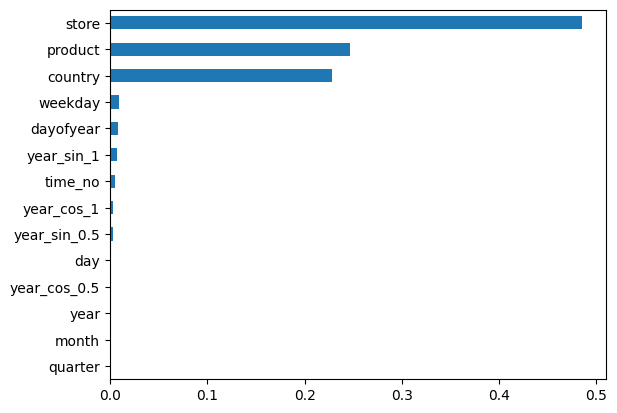

In [47]:
pd.Series(data=model.feature_importances_,
          index=model.feature_names_in_).sort_values().plot(kind='barh')

In [31]:
def plot_results(column):
    values = X_train[column].unique()
    fig, axs = plt.subplots(len(values), 1, figsize=(8,len(values)*3), sharex=True)

    temp = X_test.copy()
    temp['date'] = pd.to_datetime(dict(year=temp.year, month=temp.month, day=temp.day))
    temp[TARGET] = y_test
    temp['y_pred'] = y_pred

    for i, value in enumerate(values):
        df_sub = temp[temp[column] == value].copy()
        df_sub.groupby('date')[TARGET].sum().plot(ax=axs[i], alpha=0.5, label='y_true')
        df_sub.dropna().groupby('date')['y_pred'].sum().plot(ax=axs[i], alpha=0.5, label='y_pred')
        
        score = round(mean_absolute_error(df_sub.dropna()[TARGET], df_sub.dropna()['y_pred']), 3)
        axs[i].set_title(f'{column}: {value}, smape {score}')
        axs[i].legend()

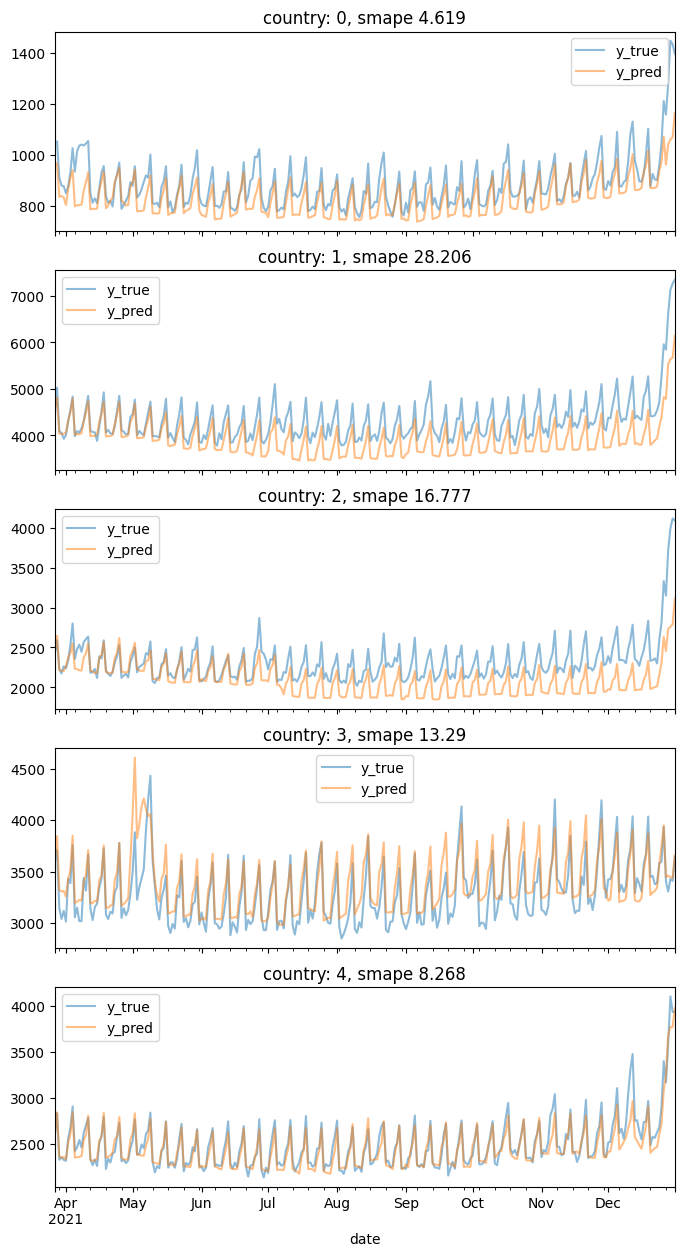

In [32]:
plot_results('country')

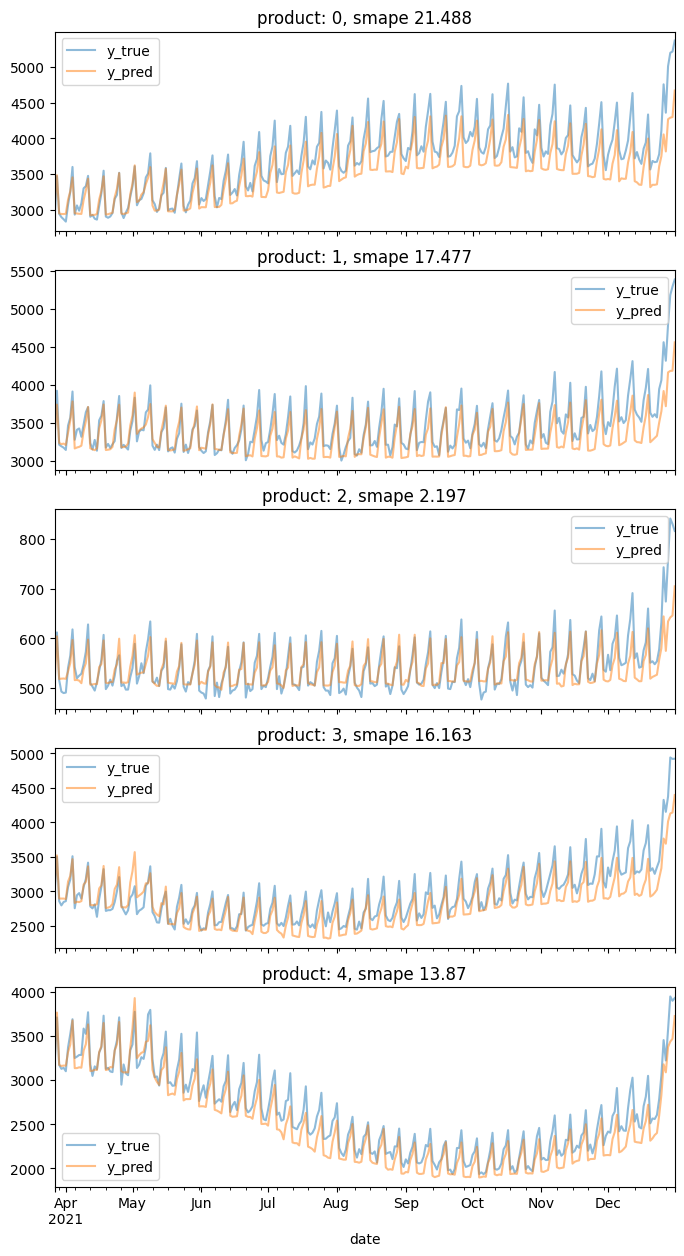

In [33]:
plot_results('product')

In [34]:
plot_results('store')